In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

In [2]:
df = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
bedroom_count=df['bedrooms'].value_counts()
bathroom_count=df['bathrooms'].value_counts()
stories_count=df['stories'].value_counts()
mainroad_count=df['mainroad'].value_counts()
guestroom_count=df['guestroom'].value_counts()
furnishingstatus_count=df['furnishingstatus'].value_counts()

In [8]:
furnishingstatus_count

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [9]:
bedroom_count

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [10]:
bathroom_count

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [11]:
stories_count

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

In [12]:
mainroad_count

mainroad
yes    468
no      77
Name: count, dtype: int64

In [13]:
guestroom_count

guestroom
no     448
yes     97
Name: count, dtype: int64

In [14]:
# encode=LabelEncoder()

In [15]:
# encode_col=['furnishingstatus','hotwaterheating','airconditioning','basement','prefarea']
# for i in encode_col:
#     df[i]=encode.fit_transform(df[i])

In [16]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df = pd.get_dummies(df, columns=['hotwaterheating'], drop_first=True)
df = pd.get_dummies(df, columns=['airconditioning'], drop_first=True)
df = pd.get_dummies(df, columns=['basement'], drop_first=True)
df = pd.get_dummies(df, columns=['prefarea'], drop_first=True)

In [17]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [18]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,hotwaterheating_yes,airconditioning_yes,basement_yes,prefarea_yes
0,13300000,7420,4,2,3,yes,no,2,0,0,0,1,0,1
1,12250000,8960,4,4,4,yes,no,3,0,0,0,1,0,0
2,12250000,9960,3,2,2,yes,no,2,1,0,0,0,1,1
3,12215000,7500,4,2,2,yes,no,3,0,0,0,1,1,1
4,11410000,7420,4,1,2,yes,yes,2,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,2,0,1,0,0,1,0
541,1767150,2400,3,1,1,no,no,0,1,0,0,0,0,0
542,1750000,3620,2,1,1,yes,no,0,0,1,0,0,0,0
543,1750000,2910,3,1,1,no,no,0,0,0,0,0,0,0


In [32]:
binary_cols = ['mainroad', 'guestroom']
df[binary_cols] = x[binary_cols].replace({'yes': 1, 'no': 0})

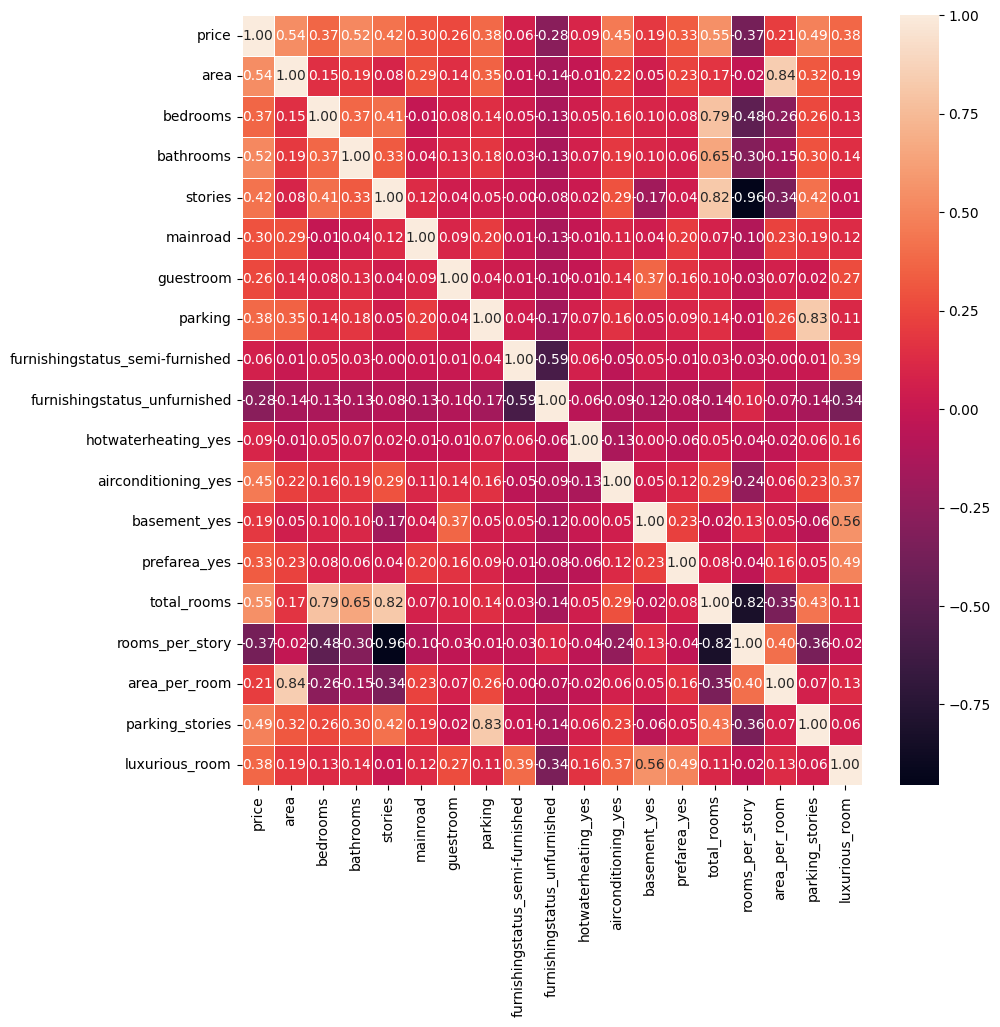

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [34]:
df['total_rooms'] = df['bedrooms']+df['bathrooms']+df['stories']
df['rooms_per_story'] = (df['bedrooms'] + df['bathrooms']+(df['guestroom']==1).sum()
 +(df['furnishingstatus_semi-furnished']==1).sum()
 +(df['hotwaterheating_yes']==1).sum()
 +(df['airconditioning_yes']==1).sum()
 +(df['basement_yes']==1).sum()
 +(df['prefarea_yes']==1).sum()) / (df['stories'] + 1)
print(df['rooms_per_story'].value_counts())

rooms_per_story
281.333333    112
421.500000    109
422.000000     91
281.666667     61
282.000000     37
169.000000     21
211.000000     20
281.000000     19
422.500000     16
211.250000     16
168.800000      9
169.200000      9
423.000000      8
282.333333      6
282.666667      3
211.500000      2
421.000000      2
169.600000      1
211.750000      1
169.400000      1
423.500000      1
Name: count, dtype: int64


In [35]:
df['area_per_room'] = df['area'] / (df['total_rooms'] + 1)
df['parking_stories'] = df['parking'] * df['stories']
print(df['area_per_room'].value_counts())
print(df['parking_stories'].value_counts())

area_per_room
600.000000     15
500.000000     10
720.000000      6
900.000000      6
750.000000      6
               ..
350.000000      1
1281.000000     1
441.000000      1
1164.285714     1
724.000000      1
Name: count, Length: 374, dtype: int64
parking_stories
0     299
2     111
4      55
1      45
3      12
8      11
6       9
12      3
Name: count, dtype: int64


In [36]:
cols = [
    'furnishingstatus_semi-furnished',
    'hotwaterheating_yes',
    'airconditioning_yes',
    'basement_yes',
    'prefarea_yes'
]
print(df[cols].sum())


furnishingstatus_semi-furnished    227
hotwaterheating_yes                 25
airconditioning_yes                172
basement_yes                       191
prefarea_yes                       128
dtype: int64


In [37]:
luxury_cols = [
    'furnishingstatus_semi-furnished',
    'hotwaterheating_yes',
    'airconditioning_yes',
    'basement_yes',
    'prefarea_yes'
]

df['luxurious_room'] = (df[luxury_cols].sum(axis=1) >= 2).astype(int)
print(df['luxurious_room'].value_counts())

luxurious_room
0    307
1    238
Name: count, dtype: int64


In [38]:
x=df.drop(columns='price',axis=True)
y=df['price']

In [39]:
furnishingstatus_unfurnished_count=df['furnishingstatus_unfurnished'].value_counts()
hotwaterheating_yes_count=df['hotwaterheating_yes'].value_counts()
airconditioning_yes_count=df['airconditioning_yes'].value_counts()
basement_yes_count=df['basement_yes'].value_counts()
luxurious_room_count=df['luxurious_room'].value_counts()

In [40]:
luxurious_room_count

luxurious_room
0    307
1    238
Name: count, dtype: int64

In [41]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,hotwaterheating_yes,airconditioning_yes,basement_yes,prefarea_yes,total_rooms,rooms_per_story,area_per_room,parking_stories,luxurious_room
0,7420,4,2,3,1,0,2,0,0,0,1,0,1,9,211.500000,742.000000,6,1
1,8960,4,4,4,1,0,3,0,0,0,1,0,0,12,169.600000,689.230769,12,0
2,9960,3,2,2,1,0,2,1,0,0,0,1,1,7,281.666667,1245.000000,4,1
3,7500,4,2,2,1,0,3,0,0,0,1,1,1,8,282.000000,833.333333,6,1
4,7420,4,1,2,1,1,2,0,0,0,1,1,0,7,281.666667,927.500000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,2,0,1,0,0,1,0,4,421.500000,600.000000,2,0
541,2400,3,1,1,0,0,0,1,0,0,0,0,0,5,422.000000,400.000000,0,0
542,3620,2,1,1,1,0,0,0,1,0,0,0,0,4,421.500000,724.000000,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,0,0,5,422.000000,485.000000,0,0


In [42]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=100)

In [45]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [46]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(n_estimators=150, learning_rate=0.4)
xg_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# model_g = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=model_g, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
# grid_search.fit(x_train, y_train)

In [49]:
y_pred_lr=lr_model.predict(x_test)
y_pred_xg=xg_model.predict(x_test)
y_pred_rf=xg_model.predict(x_test)
# y_pred_g=xg_model.predict(x_test)

In [50]:
ln_acc_lr=r2_score(y_test, y_pred_lr)
ln_acc_xg=r2_score(y_test, y_pred_xg)
ln_acc_rf=r2_score(y_test, y_pred_rf)
# ln_acc_g=r2_score(y_test, y_pred_g)
print("LinearRegression:{:.2f}%".format(ln_acc_lr*100))
print("XGBRegressor:{:.2f}%".format(ln_acc_xg*100))
print("RandomForestRegressor:{:.2f}%".format(ln_acc_rf*100))
# print("RandomForestRegressor:{:.2f}%".format(ln_acc_rf*100))

LinearRegression:62.35%
XGBRegressor:71.68%
RandomForestRegressor:71.68%
